In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/Users/yenalee/Desktop/workplace/AI_2025-1/week6/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df = df.drop('Outcome', axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [5]:
# BMI가 0인 행 찾기
bmi_zero_rows = df[df['BMI'] == 0]

# 결과 출력
print(f"BMI가 0인 행 개수: {len(bmi_zero_rows)}")
print(bmi_zero_rows)

BMI가 0인 행 개수: 11
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
9              8      125             96              0        0  0.0   
49             7      105              0              0        0  0.0   
60             2       84              0              0        0  0.0   
81             2       74              0              0        0  0.0   
145            0      102             75             23        0  0.0   
371            0      118             64             23       89  0.0   
426            0       94              0              0        0  0.0   
494            3       80              0              0        0  0.0   
522            6      114              0              0        0  0.0   
684            5      136             82              0        0  0.0   
706           10      115              0              0        0  0.0   

     DiabetesPedigreeFunction  Age  
9                       0.232   54  
49                      0.305   

In [6]:
df = df[df['BMI'] != 0]

In [7]:
# 데이터와 타겟 분리
x = df.drop('BMI', axis=1).values
y = df['BMI'].values

In [8]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [9]:
x

array([[ 0.64015734,  0.83844356,  0.12637972, ..., -0.69911293,
         0.46943005,  1.43016201],
       [-0.84452129, -1.12783358, -0.20200512, ..., -0.69911293,
        -0.36882299, -0.19515564],
       [ 1.23402879,  1.93081975, -0.31146674, ..., -0.69911293,
         0.60610174, -0.10961261],
       ...,
       [ 0.34322161, -0.00424664,  0.12637972, ...,  0.26945727,
        -0.69076076, -0.28069867],
       [-0.84452129,  0.1518071 , -0.53038997, ..., -0.69911293,
        -0.37489729,  1.1735329 ],
       [-0.84452129, -0.87814759,  0.01691811, ..., -0.69911293,
        -0.47816035, -0.87949991]])

In [10]:
y

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5, 37.6, 38. ,
       27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4, 39.8,
       29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8, 19.9,
       27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4, 27.4,
       42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. , 37.7,
       46.8, 40.5, 41.5, 32.9, 25. , 25.4, 32.8, 29. , 32.5, 42.7, 19.6,
       28.9, 32.9, 28.6, 43.4, 35.1, 32. , 24.7, 32.6, 37.7, 43.2, 25. ,
       22.4, 29.3, 24.6, 48.8, 32.4, 36.6, 38.5, 37.1, 26.5, 19.1, 32. ,
       46.7, 23.8, 24.7, 33.9, 31.6, 20.4, 28.7, 49.7, 39. , 26.1, 22.5,
       26.6, 39.6, 28.7, 22.4, 29.5, 34.3, 37.4, 33.3, 34. , 31.2, 34. ,
       30.5, 31.2, 34. , 33.7, 28.2, 23.2, 53.2, 34.2, 33.6, 26.8, 33.3,
       55. , 42.9, 33.3, 34.5, 27.9, 29.7, 33.3, 34.5, 38.3, 21.1, 33.8,
       30.8, 28.7, 31.2, 36.9, 21.1, 39.5, 32.5, 32.4, 32.8, 32.8, 30.5,
       33.7, 27.3, 37.4, 21.9, 34.3, 40.6, 47.9, 50

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) 

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((605, 7), (152, 7), (605,), (152,))

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Convert to PyTorch tensors
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [14]:
# Create DataLoader
train_dataset = TensorDataset(x_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(x_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [15]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([605, 7]),
 torch.Size([152, 7]),
 torch.Size([605, 1]),
 torch.Size([152, 1]))

In [16]:
class DiabateDense(nn.Module):
    def __init__(self):
        super(DiabateDense, self).__init__()
        self.fc1 = nn.Linear(7,64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # 1 classes in the dataset
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = DiabateDense()

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DiabateDense().to(device)

In [18]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [19]:
train_losses = []
test_losses = []

num_epochs = 30

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    
    for X_batch, y_batch in train_dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    # 평균 손실 저장
    avg_loss = total_loss / len(train_dataloader)
    train_losses.append(avg_loss)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {avg_loss:.4f}")
    
    # 평가 모드
    model.eval()
    test_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in test_dataloader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            all_preds.extend(outputs.cpu().numpy())
            all_labels.extend(y_batch.numpy())

# 회귀 평가 지표
all_preds = np.array(all_preds).flatten()
all_labels = np.array(all_labels).flatten()

mse = mean_squared_error(all_labels, all_preds)

print(f"\nTest MSE : {mse:.4f}")

Epoch 1/30, Train Loss: 235.2198
Epoch 2/30, Train Loss: 56.7836
Epoch 3/30, Train Loss: 44.6766
Epoch 4/30, Train Loss: 33.1164
Epoch 5/30, Train Loss: 38.9106
Epoch 6/30, Train Loss: 44.0843
Epoch 7/30, Train Loss: 35.2081
Epoch 8/30, Train Loss: 33.9116
Epoch 9/30, Train Loss: 31.1129
Epoch 10/30, Train Loss: 31.8315
Epoch 11/30, Train Loss: 32.0973
Epoch 12/30, Train Loss: 30.4240
Epoch 13/30, Train Loss: 29.3928
Epoch 14/30, Train Loss: 30.3890
Epoch 15/30, Train Loss: 31.5909
Epoch 16/30, Train Loss: 28.4026
Epoch 17/30, Train Loss: 28.9511
Epoch 18/30, Train Loss: 30.8857
Epoch 19/30, Train Loss: 33.5279
Epoch 20/30, Train Loss: 35.1234
Epoch 21/30, Train Loss: 34.0722
Epoch 22/30, Train Loss: 39.8965
Epoch 23/30, Train Loss: 30.3642
Epoch 24/30, Train Loss: 33.9892
Epoch 25/30, Train Loss: 29.3420
Epoch 26/30, Train Loss: 30.9157
Epoch 27/30, Train Loss: 30.8175
Epoch 28/30, Train Loss: 28.1509
Epoch 29/30, Train Loss: 33.7862
Epoch 30/30, Train Loss: 30.7218

Test MSE : 36.841

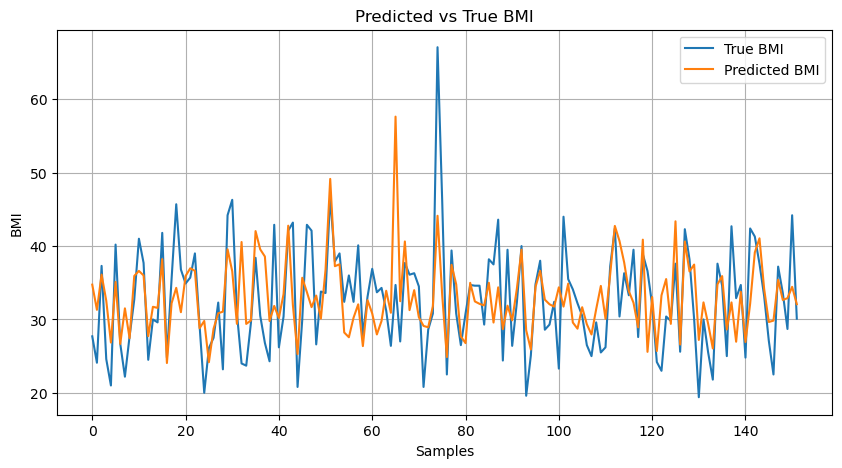

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(all_labels, label='True BMI')
plt.plot(all_preds, label='Predicted BMI')
plt.title('Predicted vs True BMI')
plt.xlabel('Samples')
plt.ylabel('BMI')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
for i in range(100):
    print(f"{i:02d} | Test: {all_labels[i]:6.2f} | Pred: {all_preds[i]:6.2f} | Error: {abs(all_labels[i]-all_preds[i]):6.2f}")

00 | Test:  27.70 | Pred:  34.75 | Error:   7.05
01 | Test:  24.10 | Pred:  31.31 | Error:   7.21
02 | Test:  37.30 | Pred:  36.11 | Error:   1.19
03 | Test:  24.60 | Pred:  32.56 | Error:   7.96
04 | Test:  21.00 | Pred:  26.85 | Error:   5.85
05 | Test:  40.20 | Pred:  35.11 | Error:   5.09
06 | Test:  26.70 | Pred:  26.66 | Error:   0.04
07 | Test:  22.20 | Pred:  31.51 | Error:   9.31
08 | Test:  27.70 | Pred:  27.44 | Error:   0.26
09 | Test:  32.70 | Pred:  35.93 | Error:   3.23
10 | Test:  41.00 | Pred:  36.62 | Error:   4.38
11 | Test:  37.70 | Pred:  35.99 | Error:   1.71
12 | Test:  24.50 | Pred:  27.72 | Error:   3.22
13 | Test:  30.00 | Pred:  31.72 | Error:   1.72
14 | Test:  29.60 | Pred:  31.57 | Error:   1.97
15 | Test:  41.80 | Pred:  38.22 | Error:   3.58
16 | Test:  24.80 | Pred:  24.06 | Error:   0.74
17 | Test:  35.50 | Pred:  32.20 | Error:   3.30
18 | Test:  45.70 | Pred:  34.31 | Error:  11.39
19 | Test:  36.80 | Pred:  30.99 | Error:   5.81
20 | Test:  34.90 | 